In [8]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
best_model_weight=[None]
best_model_cv_loss=[None]
def norm(input):
    input=input-input.mean(axis=0)
    input=input/input.std(axis=0)
    return input



In [9]:
## we will not do normalization inside this function, please do nomalization outside this functiuon
do_print=False
def my_regression(trainX,testX,noutputs):
    phi=None
    phi=trainX[:,0:trainX.shape[1]-noutputs]

    T=trainX[:,trainX.shape[1]-noutputs:]
    # try different model 
    poly_degree=(1,2,3,4,5) # 1 for linear model,2~6 for poly model
    m_lambda=(0,0.0001,0.001,0.01,0.1,1,10,100) # 0 for no regular, 

    # using different method to build the input for different modle
    models_map=dict() # record all the models and cv loss
    for t_poly in poly_degree: # test every poly degree
        #print("degree = %d"%(t_poly))
        phi=trainX[:,0:trainX.shape[1]-noutputs]
        #print("trainX:",trainX)
        #print("phi",phi)
        # build poly input
        poly=PolynomialFeatures(t_poly)
        phi=poly.fit_transform(phi) # the fist column is all one
        min_loss=float("inf")
        for t_lambda in m_lambda: #test every lambda for
            if do_print and t_poly==1 and t_lambda==0:
                print("start cv at linear base function, the weight and loss are showed:")
            #print("lmbda=",t_lambda)
            cv=np.array([])
            for cross_valid in range(5):# cross validation
                total=len(phi)
                start=int(total*cross_valid/5)
                end=int(total*(cross_valid+1)/5)
                if start==end:
                    end=end+1
                test_case=phi[start:end]
                #print("phi",phi)
                train_case=np.append(phi[0:start],phi[end:],axis=0)
                test_T=T[start:end]
                train_T=np.append(T[0:start],T[end:],axis=0)
                #print("train case",train_case)
                #if len(train_case)==1:
                #    W=np.dot(np.linalg.pinv(train_case),train_T)
                #else:
                #    W=np.dot(np.dot(np.linalg.inv( t_lambda * np.eye(train_case.shape[1]) + np.dot(train_case.T,train_case)),train_case.T),train_T)#
                #if t_poly==1 and t_lambda==0 and do_print==True:
                n_col=train_case.shape[1]
                W=np.linalg.lstsq(train_case.T.dot(train_case) + t_lambda * np.identity(n_col), train_case.T.dot(train_T),rcond=None)[0]

                if t_poly==1 and t_lambda==0 and do_print==True:
                    print("W=",W)
                #print("train_out=",np.dot(train_case,W))
                test_out=np.dot(test_case,W)
                #print(test_out)
                t_loss=np.average((test_out-test_T)**2)
                if t_poly==1 and t_lambda==0 and do_print==True:
                    print("loss=",t_loss)
                #print("t_loss=",t_loss)
                cv=np.append(cv,t_loss)
            #print(cv)# the cv 
            models_map[(t_poly,t_lambda)]=np.average(cv)
            if np.average(cv)<min_loss:
                min_loss=np.average(cv)
    #print(models_map)
    best_model_cv_loss[0]=min_loss
    min=float("inf")
    min_model=0
    #print(models_map)
    for model in models_map:
        if models_map[model]<min:
            min=models_map[model]
            min_model=model
    if do_print:
        print("the best polynomial degree is %d,and the regularization degree lambda is: %f"%(min_model[0],min_model[1]))
    #print(min_model)
    #print(min)
    t_poly,t_lambda=min_model

    # train the whole trainning set
    phi=trainX[:,0:trainX.shape[1]-noutputs]
        # build poly input
    poly=PolynomialFeatures(t_poly)
    
    phi=poly.fit_transform(phi) # the fist column is all one   
    n_col=phi.shape[1]
    W=np.linalg.lstsq(phi.T.dot(phi) + t_lambda * np.identity(n_col), phi.T.dot(T),rcond=None)[0]
   
    #print(testX)
    best_model_weight[0]=W
    loss=np.average((T-np.dot(phi,W))**2)
    if do_print:
        print(" the best model after cv, the loss is :%f"% loss)
    poly=PolynomialFeatures(t_poly)
    testX=poly.fit_transform(testX) # the fist column is all one   
    #print(testX)
    return np.dot(testX,W)





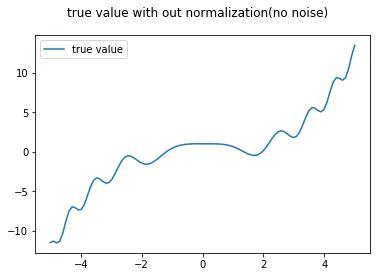

In [10]:

##main:

# question 1:
import matplotlib.pyplot as plt
#trainX=np.array([[1,2,4],[4,21,29],[5,10,20],[2,3,7],[8,100,116],[3,4,10],[9,100,118]])
def fx(x,delta):
    return 0.1*(x**3)+(np.cos(x**2)) + np.random.normal(0,delta)
x=np.linspace(-5.0,5.0,100)
y=np.array([fx(t,0) for t in x])
plt.plot(x,y,label="true value")
plt.suptitle("true value with out normalization(no noise)")
plt.legend()
plt.show()




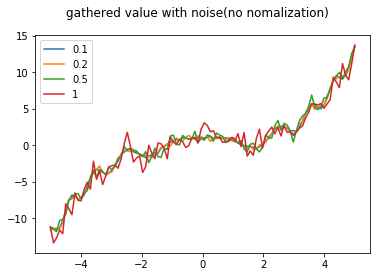

In [11]:
# question 2:

y1=np.array([fx(t,0.1) for t in x])
y2=np.array([fx(t,0.2) for t in x])
y3=np.array([fx(t,0.5) for t in x])
y4=np.array([fx(t,1) for t in x])
plt.clf()
plt.plot(x,y1,label="0.1")
plt.plot(x,y2,label="0.2")
plt.plot(x,y3,label="0.5")
plt.plot(x,y4,label="1")
plt.suptitle("gathered value with noise(no nomalization)")
plt.legend()
plt.show()

start cv at linear base function, the weight and loss are showed:
W= [[0.1036445 ]
 [0.74684441]]
loss= 0.4663630443550292
W= [[-0.1041915]
 [ 0.9818222]]
loss= 0.2917372906354421
W= [[-0.03942748]
 [ 0.91387335]]
loss= 0.07039083744176265
W= [[0.13320706]
 [0.99982428]]
loss= 0.4595765429308162
W= [[-0.07899937]
 [ 0.77892907]]
loss= 0.3952240097919812
the best polynomial degree is 4,and the regularization degree lambda is: 0.010000
 the best model after cv, the loss is :0.019099


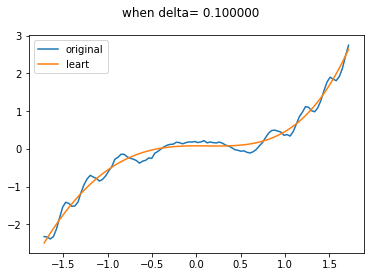

start cv at linear base function, the weight and loss are showed:
W= [[0.10348699]
 [0.74516116]]
loss= 0.48075009247948025
W= [[-0.10397979]
 [ 0.98088925]]
loss= 0.2944546745886938
W= [[-0.03915298]
 [ 0.91273251]]
loss= 0.07193636632707959
W= [[0.13475202]
 [1.00004082]]
loss= 0.474126587890573
W= [[-0.08150882]
 [ 0.77483577]]
loss= 0.38747977818251256
the best polynomial degree is 4,and the regularization degree lambda is: 0.000000
 the best model after cv, the loss is :0.020477


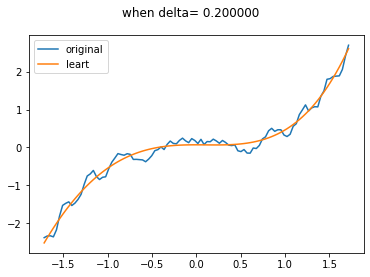

start cv at linear base function, the weight and loss are showed:
W= [[0.09630759]
 [0.75559248]]
loss= 0.4182448329895717
W= [[-0.09983395]
 [ 0.97808255]]
loss= 0.2875791659326192
W= [[-0.03720693]
 [ 0.91193268]]
loss= 0.07223113731888371
W= [[0.13747386]
 [1.00188517]]
loss= 0.5132950825495393
W= [[-0.08996788]
 [ 0.76324124]]
loss= 0.41769296868454464
the best polynomial degree is 4,and the regularization degree lambda is: 0.000000
 the best model after cv, the loss is :0.029210


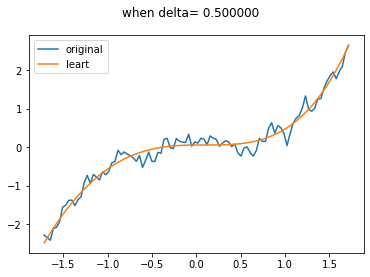

start cv at linear base function, the weight and loss are showed:
W= [[0.12313525]
 [0.70365585]]
loss= 0.6499205394994234
W= [[-0.10668362]
 [ 0.96997233]]
loss= 0.36690647743013793
W= [[-0.04773822]
 [ 0.89776685]]
loss= 0.1023419515153238
W= [[0.1181695 ]
 [0.97718027]]
loss= 0.3968538663067418
W= [[-0.04996459]
 [ 0.80662057]]
loss= 0.2776626926325186
the best polynomial degree is 3,and the regularization degree lambda is: 1.000000
 the best model after cv, the loss is :0.053908


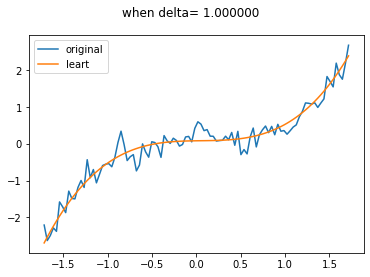

In [12]:
# try to degression
i=0
do_print=True
for y,delta in zip([y1,y2,y3,y4],[0.1,0.2,0.5,1]):
    input=np.append(x.reshape(-1,1),y.reshape(-1,1),axis=1)
    out=my_regression(norm(input),norm(input[:,0:-1]),1)
    plt.clf()
    plt.plot(norm(x.reshape(-1,1)),norm(y.reshape(-1,1)),label="original")
    plt.plot(norm(x.reshape(-1,1)),norm(out),label="leart")
    plt.suptitle("when delta= %f" % delta)
    plt.legend()
    plt.show()


In [13]:
# question 3:

num_of_trainining=[2,5,10,20,50,100,200,500]
div=[0.1,0.2,0.5,1]
loss_dict=dict()
weight_dict=dict()
do_print=False
i=0
j=0
data=np.ndarray([len(num_of_trainining),len(div)],dtype=np.float)
print(data.shape)
for num in num_of_trainining:
    j=0
    for d in div:

        x=np.linspace(-4.8,5.2,num)
        y=[fx(t,d) for t in x ]
        
        trainX=[[t1,t2] for t1,t2 in zip(x,y) ]
        #print(trainX)
        trainX=np.array(trainX)
        trainX=norm(trainX)
        #print(trainX)
        trainOut=my_regression(trainX,trainX[:,0:-1],1)
        loss_dict[(num,d)]=best_model_cv_loss[0]
        weight_dict[(num,d)]=best_model_weight[0]
        data[i,j]=best_model_cv_loss[0]
        j=j+1
    i=i+1
print(data)


(8, 4)
[[1.         1.         1.         1.        ]
 [0.04031787 0.01404819 0.08417726 0.13436044]
 [0.16407919 0.18689893 0.28053082 0.24518495]
 [0.11299928 0.13647214 0.21007892 0.30263906]
 [0.11947641 0.11752832 0.19328714 0.311258  ]
 [0.14250385 0.15834525 0.09553038 0.13946373]
 [0.11276388 0.11973858 0.17858218 0.2120579 ]
 [0.10489129 0.12648404 0.10667315 0.15559581]]


In [14]:
data=[("./airfoil_self_noise.dat",1),("yacht_hydrodynamics.data",1),("slump_test.data",3)]

for d in data:
    print(d[0])
    inputs=[]
    with open(d[0]) as f:
        for line in iter(f.readline,''):
            inputs.append(line.split())
    inputs=np.array(inputs)
    inputs=inputs.astype(np.float)
    inputs=norm(inputs)
    trainX=inputs[0:-10]
    testX=inputs[-10:]
    print(trainX.shape)
    print(testX.shape)

    do_print=True
    testOut=my_regression(trainX,testX[:,0:-d[1]],d[1])
    print(testOut)
    testT=testX[:,-d[1]:]
    print(testT)
    pass

./airfoil_self_noise.dat
(1493, 6)
(10, 6)
start cv at linear base function, the weight and loss are showed:
W= [[-0.00192313]
 [-0.55612664]
 [-0.38095983]
 [-0.50418312]
 [ 0.2301177 ]
 [-0.25109865]]
loss= 0.19617195044137545
W= [[ 0.01330969]
 [-0.53156546]
 [-0.39413261]
 [-0.50584268]
 [ 0.21801056]
 [-0.25228226]]
loss= 0.4269229376661415
W= [[ 0.02854572]
 [-0.560421  ]
 [-0.40539333]
 [-0.48866775]
 [ 0.21749743]
 [-0.19384207]]
loss= 0.5058303076863924
W= [[ 0.00294831]
 [-0.74411414]
 [-0.21660287]
 [-0.42726587]
 [ 0.24253159]
 [-0.3568373 ]]
loss= 1.1520937848736976
W= [[-0.03286167]
 [-0.54497891]
 [-0.42267121]
 [-0.48519431]
 [ 0.21008827]
 [-0.25725783]]
loss= 0.5880630629136585
the best polynomial degree is 2,and the regularization degree lambda is: 100.000000
 the best model after cv, the loss is :0.370092
[[-1.00908554]
 [-1.10528999]
 [-1.22566863]
 [-1.39442848]
 [-1.5876251 ]
 [-1.82961319]
 [-2.1450155 ]
 [-2.5588596 ]
 [-3.047759  ]
 [-3.68659942]]
[[-0.8514552

ValueError: setting an array element with a sequence.